# Laboratorium 5 - MOwNiT2

Zadanie zajęć z dr Malawskim.
<br> https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/R/
<br> (seria 4: https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/)

In [1]:
using Pkg

Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Polynomials")

using CSV
using Plots
using DataFrames
using Statistics
using Polynomials

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


### Zadanie 1.
Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.

In [2]:
function naive_multiplication(A,B)
    C=zeros(Float64,size(A,1),size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] += A[i,k] * B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
function better_multiplication(A,B)
    C=zeros(Float64,size(A,1),size(B,2))        
    for i=1:size(B,2)                           
        for j=1:size(A,2)                       
            for k=1:size(A,1)                   
                C[k,i] += A[k,j] * B[j,i]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [4]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall

#kompilacja
naive_multiplication(Asmall,Bsmall)
better_multiplication(Asmall, Bsmall)
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [5]:
df_julia = DataFrame(size = Int[], version = String[], time = Float64[])

trials = 10;
iterations = 10;
steps = 100;

In [6]:
for j = 1:trials
    for i = 1:iterations
        s = i * steps
        A = rand(s,s)
        B = rand(s,s)

        t = @elapsed naive_multiplication(A,B)
        push!(df_julia, [s, "naive", t])

        t = @elapsed better_multiplication(A,B)
        push!(df_julia, [s, "better", t])

        t = @elapsed A*B
        push!(df_julia, [s, "blas", t])
    end
end

df_julia

,size,version,time
,Int64,String,Float64
1,100,naive,0.00278019
2,100,better,0.00138897
3,100,blas,0.0019299
4,200,naive,0.0245921
5,200,better,0.0111601
6,200,blas,0.000745106
7,300,naive,0.0822918
8,300,better,0.0367837
9,300,blas,0.00156754


In [7]:
df_julia_with_mean_and_std = by(df_julia, [1,2]) do grouped
    DataFrame(time_mean = mean(grouped[3]), time_std = std(grouped[3]))
end

,size,version,time_mean,time_std
,Int64,String,Float64,Float64
1,100,naive,0.00300528,0.000250056
2,100,better,0.00167162,0.000494755
3,100,blas,0.000321706,0.000585911
4,200,naive,0.0255452,0.0033086
5,200,better,0.0122131,0.00243005
6,200,blas,0.000673009,0.000199778
7,300,naive,0.0825407,0.00363837
8,300,better,0.0407647,0.00576359
9,300,blas,0.00259497,0.00260762


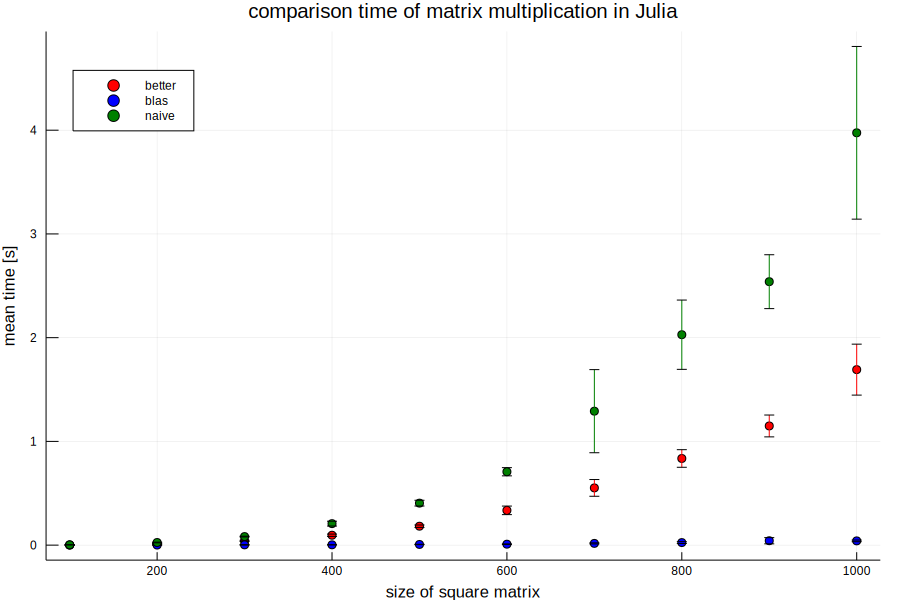

In [8]:
plot1 = scatter(df_julia_with_mean_and_std[:size], df_julia_with_mean_and_std[:time_mean],
    group = df_julia_with_mean_and_std[:version],
    yerr = df_julia_with_mean_and_std[:time_std],
    size = (900, 600), layout = 1,
    color = [:red :blue :green], legend = :topleft,
    xlabel = "size of square matrix", ylabel = "mean time [s]",
    title = "comparison time of matrix multiplication in Julia"
)

### Zadanie 2.
Napisać w języku C:
-  naiwną metodę mnożenia macierzy (wersja 1) 
-  ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
-  skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 
    
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

In [9]:
df_c = CSV.read("c_martix_multiplication_results.csv")

,size,version,time
,Int64⍰,String⍰,Float64⍰
1,100,naive,0.005226
2,100,better,0.003746
3,200,naive,0.064865
4,200,better,0.045947
5,300,naive,0.252442
6,300,better,0.132272
7,400,naive,0.455146
8,400,better,0.257719
9,500,naive,1.18333


In [10]:
df_c_with_mean_and_std = by(df_c, [1,2]) do grouped
    DataFrame(time_mean = mean(grouped[3]), time_std = std(grouped[3]))
end

,size,version,time_mean,time_std
,Int64⍰,String⍰,Float64,Float64
1,100,naive,0.0043378,0.000336931
2,100,better,0.0038173,0.000214074
3,200,naive,0.0539515,0.00417997
4,200,better,0.0324216,0.00487382
5,300,naive,0.155315,0.034335
6,300,better,0.107686,0.00889699
7,400,naive,0.425115,0.0279671
8,400,better,0.248445,0.00415583
9,500,naive,1.43728,0.251372


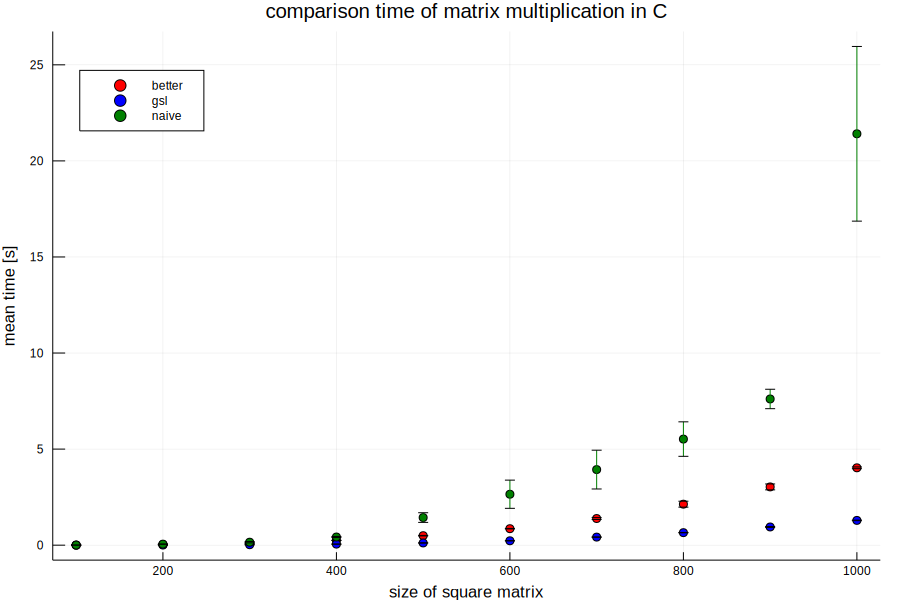

In [11]:
plot2 = scatter(df_c_with_mean_and_std[:size], df_c_with_mean_and_std[:time_mean],
    group = df_c_with_mean_and_std[:version],
    yerr = df_c_with_mean_and_std[:time_std],
    size = (900, 600), layout = 1,
    color = [:red :blue :green], legend = :topleft,
    xlabel = "size of square matrix", ylabel = "mean time [s]",
    title = "comparison time of matrix multiplication in C"
)

### Zadanie 3.
Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów.

Julia naive Poly(-0.037296311843335136 + 0.0004466651096602693*x - 1.625135323846179e-6*x^2 + 5.103575333391622e-9*x^3)
Julia better Poly(-0.021089686893334417 + 0.00024116185340909702*x - 7.406178599242521e-7*x^2 + 2.1922821734848525e-9*x^3)
Julia blas  Poly(0.00484205010000004 - 4.3935962909868254e-5*x + 1.0531617809440633e-7*x^2 - 2.142435079642625e-11*x^3)


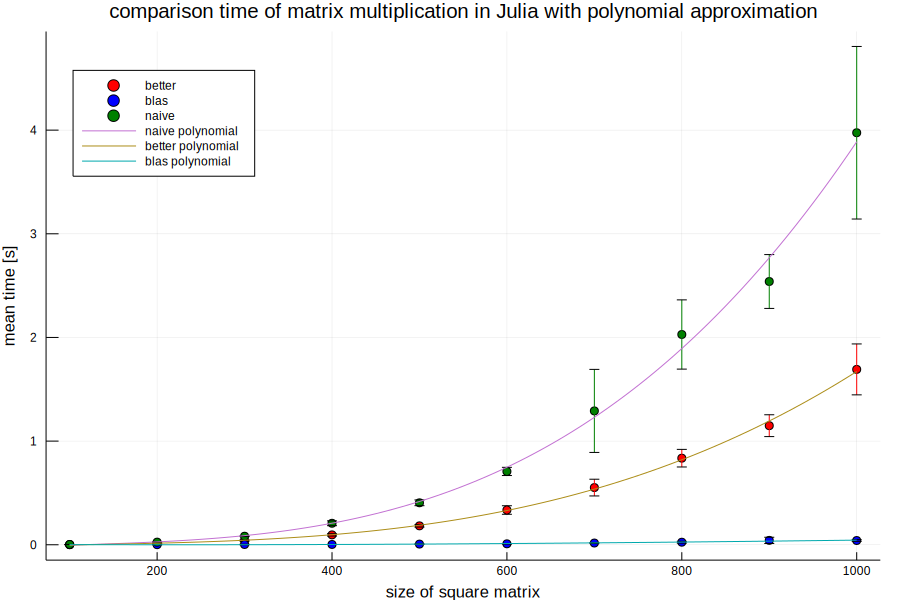

In [15]:
xd = steps:10:steps*iterations

plot3 = scatter(df_julia_with_mean_and_std[:size], df_julia_with_mean_and_std[:time_mean],
    group = df_julia_with_mean_and_std[:version],
    yerr = df_julia_with_mean_and_std[:time_std],
    size = (900, 600), layout = 1,
    color = [:red :blue :green], legend = :topleft,
    xlabel = "size of square matrix", ylabel = "mean time [s]",
    title = "comparison time of matrix multiplication in Julia with polynomial approximation"
)

naive = groupby(df_julia_with_mean_and_std,2)[1]
better = groupby(df_julia_with_mean_and_std,2)[2]
blas = groupby(df_julia_with_mean_and_std,2)[3]

fit_naive = polyfit(naive[1], naive[3], 3)
fit_better = polyfit(better[1], better[3], 3)
fit_blas = polyfit(blas[1], blas[3], 3)

println("Julia naive ", fit_naive)
println("Julia better ", fit_better)
println("Julia blas  ", fit_blas)

plot!(xd, polyval(fit_naive, xd), label = "naive polynomial")
plot!(xd, polyval(fit_better, xd), label = "better polynomial")
plot!(xd, polyval(fit_blas, xd), label = "blas polynomial")

C naive Poly(-4.126425506666675 + 0.04319127311499616*x - 0.00011334287615384624*x^2 + 9.364802090132094e-8*x^3)
C better Poly(0.0682668666666671 - 0.0006642132393162436*x + 1.471035804195815e-6*x^2 + 3.183915306915299e-9*x^3)
C blas  Poly(0.03287661999999975 - 0.00028128483721833613*x + 3.3183895687645586e-7*x^2 + 1.2160808663558665e-9*x^3)


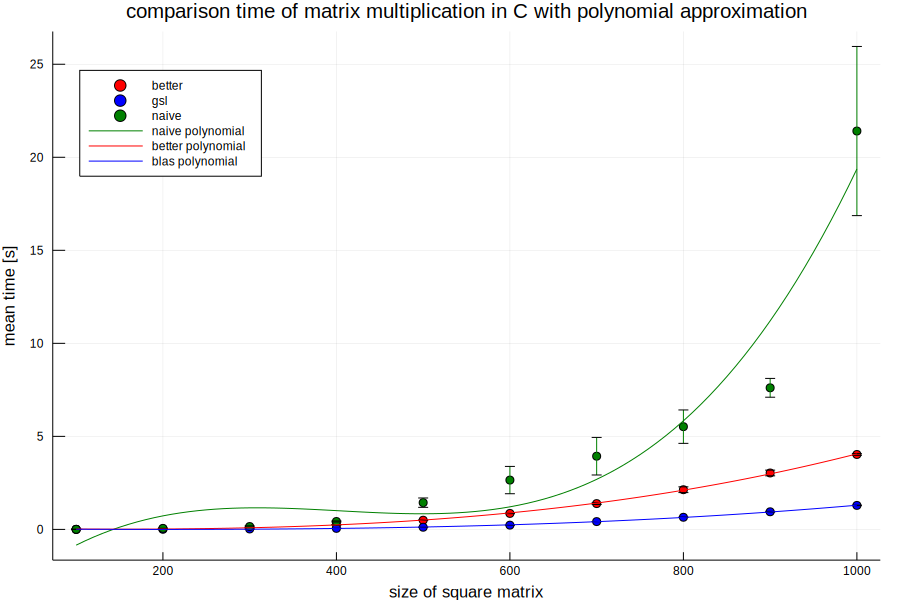

In [16]:
xd = steps:10:steps*iterations

plot4 = scatter(df_c_with_mean_and_std[:size], df_c_with_mean_and_std[:time_mean],
    group = df_c_with_mean_and_std[:version],
    yerr = df_c_with_mean_and_std[:time_std],
    size = (900, 600), layout = 1,
    color = [:red :blue :green], legend = :topleft,
    xlabel = "size of square matrix", ylabel = "mean time [s]",
    title = "comparison time of matrix multiplication in C with polynomial approximation"
)

naive = groupby(df_c_with_mean_and_std,2)[1]
better = groupby(df_c_with_mean_and_std,2)[2]
blas = groupby(df_c_with_mean_and_std,2)[3]

fit_naive = polyfit(naive[1], naive[3], 3)
fit_better = polyfit(better[1], better[3], 3)
fit_blas = polyfit(blas[1], blas[3], 3)

println("C naive ", fit_naive)
println("C better ", fit_better)
println("C blas  ", fit_blas)

plot!(xd, polyval(fit_naive, xd), label = "naive polynomial", color = [:green])
plot!(xd, polyval(fit_better, xd), label = "better polynomial", color = [:red])
plot!(xd, polyval(fit_blas, xd), label = "blas polynomial", color = [:blue])

### Zadanie 4.
Przedstawić wyniki dla języka Julia i C na wspólnym wykresie. Jaka metoda jest najszybsza? 

Julia naive Poly(-0.037296311843335136 + 0.0004466651096602693*x - 1.625135323846179e-6*x^2 + 5.103575333391622e-9*x^3)
Julia better Poly(-0.021089686893334417 + 0.00024116185340909702*x - 7.406178599242521e-7*x^2 + 2.1922821734848525e-9*x^3)
Julia blas  Poly(0.00484205010000004 - 4.3935962909868254e-5*x + 1.0531617809440633e-7*x^2 - 2.142435079642625e-11*x^3)
C naive Poly(-4.126425506666675 + 0.04319127311499616*x - 0.00011334287615384624*x^2 + 9.364802090132094e-8*x^3)
C better Poly(0.0682668666666671 - 0.0006642132393162436*x + 1.471035804195815e-6*x^2 + 3.183915306915299e-9*x^3)
C blas  Poly(0.03287661999999975 - 0.00028128483721833613*x + 3.3183895687645586e-7*x^2 + 1.2160808663558665e-9*x^3)


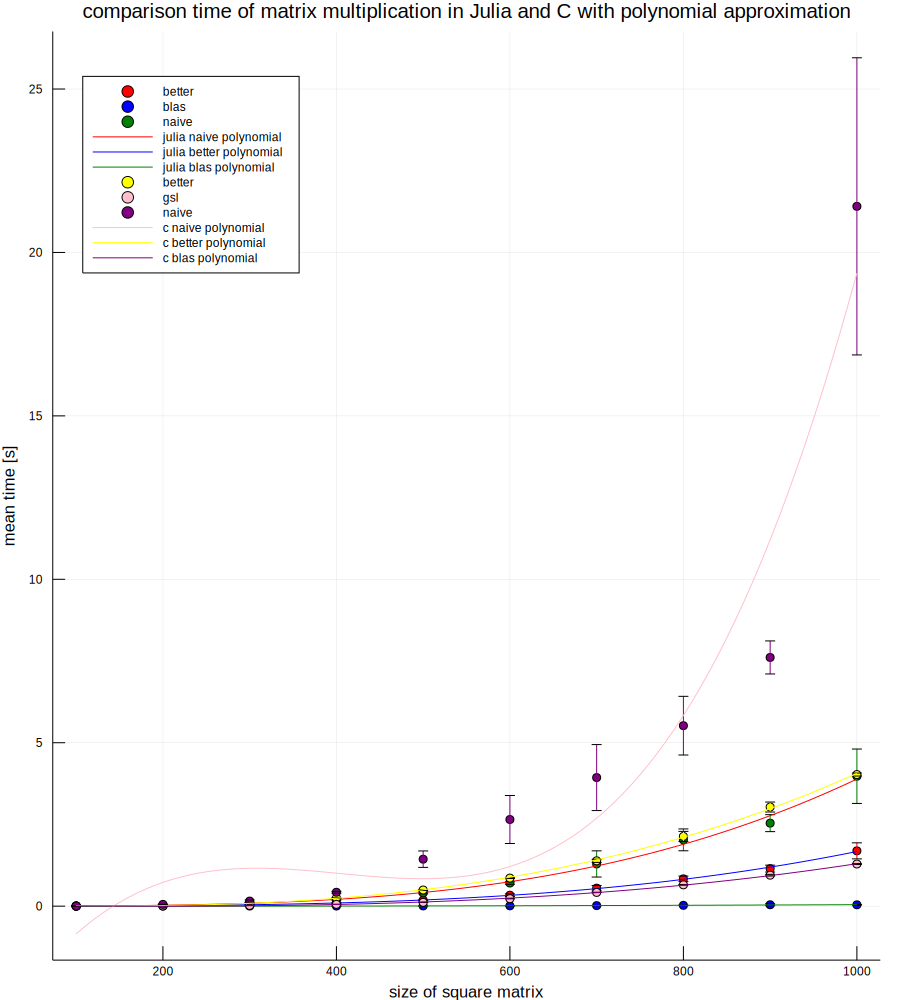

In [17]:
xd = steps:10:steps*iterations

plot5 = scatter(df_julia_with_mean_and_std[:size], df_julia_with_mean_and_std[:time_mean],
    group = df_julia_with_mean_and_std[:version],
    yerr = df_julia_with_mean_and_std[:time_std],
    size = (900, 1000), layout = 1,
    color = [:red :blue :green], legend = :topleft,
    xlabel = "size of square matrix", ylabel = "mean time [s]",
    title = "comparison time of matrix multiplication in Julia and C with polynomial approximation"
)

julia_naive = groupby(df_julia_with_mean_and_std,2)[1]
julia_better = groupby(df_julia_with_mean_and_std,2)[2]
julia_blas = groupby(df_julia_with_mean_and_std,2)[3]

julia_fit_naive = polyfit(julia_naive[1], julia_naive[3], 3)
julia_fit_better = polyfit(julia_better[1], julia_better[3], 3)
julia_fit_blas = polyfit(julia_blas[1], julia_blas[3], 3)

println("Julia naive ", julia_fit_naive)
println("Julia better ", julia_fit_better)
println("Julia blas  ", julia_fit_blas)

plot!(xd, polyval(julia_fit_naive, xd), label = "julia naive polynomial", color = [:red])
plot!(xd, polyval(julia_fit_better, xd), label = "julia better polynomial", color = [:blue])
plot!(xd, polyval(julia_fit_blas, xd), label = "julia blas polynomial", color = [:green])

scatter!(df_c_with_mean_and_std[:size], df_c_with_mean_and_std[:time_mean],
    group = df_c_with_mean_and_std[:version],
    yerr = df_c_with_mean_and_std[:time_std],
    color = [:yellow :pink :purple], layout = 1
)

c_naive = groupby(df_c_with_mean_and_std,2)[1]
c_better = groupby(df_c_with_mean_and_std,2)[2]
c_blas = groupby(df_c_with_mean_and_std,2)[3]

c_fit_naive = polyfit(c_naive[1], c_naive[3], 3)
c_fit_better = polyfit(c_better[1], c_better[3], 3)
c_fit_blas = polyfit(c_blas[1], c_blas[3], 3)

println("C naive ", c_fit_naive)
println("C better ", c_fit_better)
println("C blas  ", c_fit_blas)

plot!(xd, polyval(c_fit_naive, xd), label = "c naive polynomial", color = [:pink])
plot!(xd, polyval(c_fit_better, xd), label = "c better polynomial", color = [:yellow])
plot!(xd, polyval(c_fit_blas, xd), label = "c blas polynomial", color = [:purple])